<a href="https://colab.research.google.com/github/karentutor/ML-Term2-Project/blob/master/Independent_Project_Step_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The script is preparing data for training machine learning models. By creating multiple feature representations (BoW, TF-IDF, Word2Vec), it allows you to experiment with different methods to find the most effective one for our classification task.

#  First We begin by adding all of our dependencies
# here are are only using 20,0000 as the dataset is so long some of the later feature processes will take all day to run!

# 1. Setting Up the Environment
The script begins by importing essential Python libraries:

Data handling and cleaning: pandas, re (regex).
Natural Language Processing (NLP): spacy, collections.Counter, WordCloud.
Visualization: matplotlib, seaborn.
Machine Learning tools: Various sklearn modules for vectorization, classification, and evaluation.
Deep Learning support: torch for PyTorch and transformers for BERT.
Other tools: Word2Vec from gensim, numpy for numerical operations.

# 2. Accessing the Dataset
Mounting Google Drive: The dataset is stored on Google Drive, and the script mounts it to access files.
Loading the Dataset: Reads a CSV file (e.g., amazon_train.csv) into a Pandas DataFrame. Since the dataset may lack headers, meaningful column names (ID, Review, Text) are manually assigned.
# 3. Sampling the Dataset
Randomly samples 20,000 rows from the dataset for processing. This ensures manageable computational requirements.
# 4. Text Cleaning
Defines a clean function to preprocess the text:
Remove URLs.
Strip away punctuation and extra spaces.
Creates a new column, Text_Cleaned, which holds the cleaned text.
Adds another column, Token_Count, that counts the number of words in each cleaned text.
# 5. Extracting Linguistic Features
Loads spaCy's English language model (en_core_web_sm) for advanced NLP.
Extracts specific linguistic features from each row:
Nouns, Adjectives, Verbs, and Lemmas (base forms of words).
These features are stored as new columns in the DataFrame.
Progress is printed every 100 rows to monitor processing.
# 6. Visualizing and Analyzing Data
Token Count Distribution:
Plots a histogram of the number of tokens (words) per cleaned text.
Gives an overview of how text lengths are distributed.
Word Cloud for Nouns:
Combines all nouns across the dataset into a single text blob.
Generates a visually appealing word cloud to highlight the most frequent nouns.
What's Special About This Code?
It blends data engineering (cleaning, feature extraction) with exploratory analysis (visualizations) in a single workflow.
Prepares the data for downstream tasks, like training machine learning or deep learning models.
Leverages advanced NLP tools like spaCy for deeper linguistic insights.


Mounted at /content/drive
Columns in the dataset:
 Index(['ID', 'Review', 'Text'], dtype='object')
   ID                                             Review  \
0   2                     Stuning even for the non-gamer   
1   2              The best soundtrack ever to anything.   
2   2                                           Amazing!   
3   2                               Excellent Soundtrack   
4   2  Remember, Pull Your Jaw Off The Floor After He...   

                                                Text  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...  
Sampled data:
          ID                                  Review  \
2079998   1                          Expensive Junk   
1443106   1                          Toast too dark   
3463669   2   Excellent imager

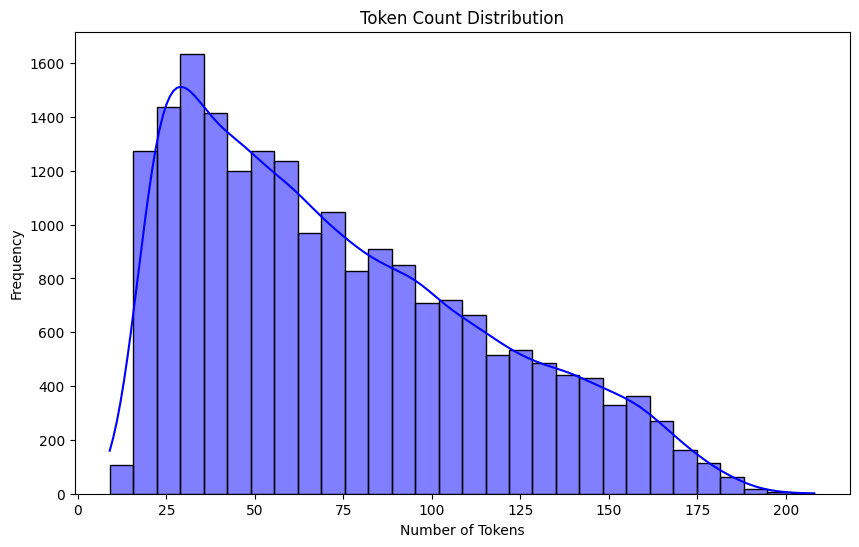

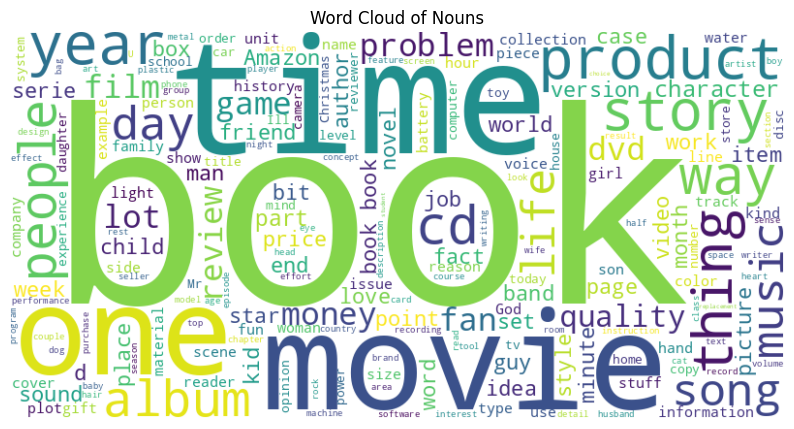

In [25]:
from google.colab import drive
import pandas as pd
import re
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# File path to the dataset in Google Drive
file_path = '/content/drive/My Drive/ML/amazon_train.csv'

# Load the dataset without headers if headers are not properly defined
data = pd.read_csv(file_path, header=None)

data.head()
data.columns = ['ID', 'Review', 'Text']  # Assign meaningful column names

# Display structure of the dataset
print("Columns in the dataset:\n", data.columns)
print(data.head())

# --- Sampling 200 Rows ---
# Sample 200 rows randomly before further processing
# increased to 20,000 as 200 was too small
data = data.sample(n=20_000, random_state=42)

# Display the sampled data
print("Sampled data:\n", data.head())

# Function to clean text
def clean(text):
    text = re.sub(r'https*://[^\s]+', "", str(text))  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    return text.strip()

# Clean text and calculate token counts
data["Text_Cleaned"] = data["Text"].apply(lambda x: clean(x) if isinstance(x, str) else "")
data["Token_Count"] = data["Text_Cleaned"].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Load spaCy for NLP
nlp = spacy.load("en_core_web_sm")

# Extract linguistic features
data["Nouns"] = ""
data["Adjectives"] = ""
data["Verbs"] = ""
data["Lemmas"] = ""

for i, row in data.iterrows():
    #if i % 100 == 0:
    #    print(f"Processing row {i}...")

    text = row["Text_Cleaned"]
    if isinstance(text, str) and len(text) > 0:
        doc = nlp(text)
        nouns = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "PROPN"]]
        adjectives = [token.lemma_ for token in doc if token.pos_ == "ADJ"]
        verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
        lemmas = [token.lemma_ for token in doc]

        data.at[i, "Nouns"] = " ".join(nouns)
        data.at[i, "Adjectives"] = " ".join(adjectives)
        data.at[i, "Verbs"] = " ".join(verbs)
        data.at[i, "Lemmas"] = " ".join(lemmas)

# --- Exploratory Analysis and Visualizations ---
# Token count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["Token_Count"], bins=30, kde=True, color="blue")
plt.title("Token Count Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()


# Word Cloud of Nouns
nouns = " ".join(data["Nouns"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(nouns)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Nouns")
plt.show()




#  Now we do feature engineering, which involves transforming raw text data into structured numerical formats suitable for machine learning models.

Here’s what each part does, in plain terms:

#1. Encoding Review Labels
Uses LabelEncoder to convert text labels (Review) into numerical labels (Encoded_Review).

Displays the class distribution before and after removing classes with fewer than 5 samples (to avoid underrepresented classes impacting the model).

#2. Splitting the Dataset
Divides the dataset into training and testing subsets while maintaining the class distribution (stratified split).
Ensures the test set is 30% of the dataset.
Prints the class distributions in both subsets to confirm proper splitting.

#3. Text Representation (Feature Engineering)

*Bag of Words (BoW)*

Converts text into a matrix of token counts (word frequencies).
Limits the vocabulary to the top 5,000 words (max_features=5000) to reduce dimensionality.
Transforms the text into numerical arrays:

X_train_bow for training.
X_test_bow for testing.

*TF-IDF (Term Frequency-Inverse Document Frequency)*

Similar to BoW but considers how important a word is relative to the document and the dataset.

Also limits the vocabulary to 5,000 most important features.
Outputs:

X_train_tfidf for training.
X_test_tfidf for testing.

*Word2Vec Embeddings*

Trains a Word2Vec model on the training text to learn dense vector representations of words.

Averages the word vectors for each text to create a single numerical representation:

X_train_word2vec: Word2Vec embeddings for the training set.
X_test_word2vec: Word2Vec embeddings for the test set.

Word2Vec captures the semantic meaning of words, unlike BoW or TF-IDF, which are more focused on frequency.

What's the Goal?
The script is preparing data for training machine learning models. By creating multiple feature representations (BoW, TF-IDF, Word2Vec), it allows you to experiment with different methods to find the most effective one for your classification task.

In [26]:
# --- Feature Engineering ---
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Reinitialize LabelEncoder
le = LabelEncoder()
data["Encoded_Review"] = le.fit_transform(data["Review"])

# Check initial class distribution
print("Initial class distribution:")
print(data["Encoded_Review"].value_counts())

# Remove classes with fewer than 5 samples
data = data.groupby("Encoded_Review").filter(lambda x: len(x) >= 5)

print("Updated class distribution (after filtering):")
print(data["Encoded_Review"].value_counts())

# Stratified split with an increased test size
X_train, X_test, y_train, y_test = train_test_split(
    data["Text_Cleaned"], data["Encoded_Review"], test_size=0.3, stratify=data["Encoded_Review"], random_state=42
)

print("Class distribution in y_train:")
print(pd.Series(y_train).value_counts())
print("Class distribution in y_test:")
print(pd.Series(y_test).value_counts())

# 1. Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(X_train).toarray()
X_test_bow = bow_vectorizer.transform(X_test).toarray()

# 2. TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

print("Feature engineering with Bag of Words and TF-IDF done.")

# 3. Word2Vec Embeddings
word2vec_model = Word2Vec(sentences=[text.split() for text in X_train], vector_size=100, window=5, min_count=1, workers=4)
X_train_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for text in X_train])
X_test_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for text in X_test])

print("Feature engineering with Word2Vec embeddings done.")


Initial class distribution:
Encoded_Review
3735     50
3756     48
4515     27
5885     19
4130     19
         ..
17691     1
17796     1
14902     1
11992     1
4029      1
Name: count, Length: 18590, dtype: int64
Updated class distribution (after filtering):
Encoded_Review
3735     50
3756     48
4515     27
5885     19
4130     19
         ..
10198     5
11411     5
5916      5
10509     5
9117      5
Name: count, Length: 100, dtype: int64
Class distribution in y_train:
Encoded_Review
3735     35
3756     34
4515     19
5885     13
4130     13
         ..
16368     3
11958     3
1819      3
14990     3
3534      3
Name: count, Length: 100, dtype: int64
Class distribution in y_test:
Encoded_Review
3735     15
3756     14
4515      8
4130      6
5885      6
         ..
3683      1
15159     1
4011      1
3812      1
11392     1
Name: count, Length: 100, dtype: int64
Feature engineering with Bag of Words and TF-IDF done.
Feature engineering with Word2Vec embeddings done.



# Now we continue with BERT

1. Setting Up
BERT Tokenizer and Model:
Loads a pre-trained BERT tokenizer and model (bert-base-uncased).
The tokenizer converts text into numerical input IDs that BERT can process.
The BERT model itself outputs contextualized word embeddings.
GPU Check:
If a GPU is available, the script moves the BERT model to the GPU for faster computation.
If no GPU is found, the model runs on the CPU (slower).

2. BERT Batch Encoding Function
This function (bert_batch_encode) processes text data in batches and computes embeddings for each text. Here's how it works:

Batch Processing:
Uses PyTorch's DataLoader to split the text data into manageable chunks (batch_size=32).
Tokenization:
Each batch of text is tokenized:
Words are converted into numerical input IDs.
Padding and truncation ensure uniform sequence lengths (up to 128 tokens).
Embedding Extraction:
Passes the tokenized input through BERT, but disables gradient calculations (torch.no_grad()) to save memory and speed up processing.
Extracts the last hidden state from BERT (a tensor representing contextualized embeddings for each token).
Applies mean pooling to condense token-level embeddings into a single vector for each text.
Progress Bar:
Uses the tqdm library to show a progress bar, helping track how much of the data has been processed.
Output:
Returns a NumPy array of embeddings, where each row corresponds to a text in the input.

3. Processing Train and Test Data
Train Data (X_train):
Generates embeddings for the training dataset using bert_batch_encode. Displays progress during processing.
Test Data (X_test):
Similarly generates embeddings for the test dataset.
Why Use This?
BERT embeddings are powerful because they encode the contextual meaning of words and sentences.
These embeddings can be used as input features for downstream tasks like classification, clustering, or similarity analysis.

In [27]:
from torch.utils.data import DataLoader
import torch
import numpy as np
from tqdm import tqdm  # Progress bar library
from transformers import BertTokenizer, BertModel

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model = bert_model.to(device)

# BERT batching function with progress bar
def bert_batch_encode(texts, batch_size=32):
    dataloader = DataLoader(list(texts), batch_size=batch_size, shuffle=False)
    embeddings = []
    total_batches = len(dataloader)  # Total number of batches
    with tqdm(total=total_batches, desc="Encoding Batches") as pbar:  # Initialize progress bar
        for batch in dataloader:
            # Tokenize the batch and move inputs to the correct device
            inputs = tokenizer(list(batch), return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
            with torch.no_grad():
                outputs = bert_model(**inputs)
            # Mean pooling on the last hidden state
            batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
            embeddings.extend(batch_embeddings)
            pbar.update(1)  # Update the progress bar
    return np.array(embeddings)

# Generate BERT embeddings for train and test datasets with progress
print("Processing X_train...")
X_train_bert = bert_batch_encode(X_train, batch_size=32)

print("Processing X_test...")
X_test_bert = bert_batch_encode(X_test, batch_size=32)



Processing X_train...


Encoding Batches: 100%|██████████| 19/19 [04:58<00:00, 15.68s/it]


Processing X_test...


Encoding Batches: 100%|██████████| 9/9 [02:08<00:00, 14.27s/it]


This script uses ELMo (Embeddings from Language Models) to create dense numerical representations of sentences, which can be used as input for machine learning models. Let’s break it down simply:

# 1. Loading the ELMo Model
The script loads the ELMo model from TensorFlow Hub.
ELMo generates contextual embeddings, meaning the same word can have different representations depending on its surrounding words.
#2. Function: elmo_encode_batch
This function processes sentences in small groups (batches) to create embeddings. Here’s what it does:

Input:
A list of sentences.
A batch_size that determines how many sentences are processed at once.
Steps:
Processes sentences in chunks (batches) to save memory.
For each batch:
Converts the batch to a TensorFlow-compatible format.
Uses ELMo to generate embeddings for every word in the sentences.
Averages all the word embeddings in a sentence to get a single embedding per sentence.
Output:
Returns an array where each row is the embedding for a sentence.
Progress Bar:
Uses tqdm to display a progress bar, so you can see how much of the work is completed.
#3. Generating Embeddings
Training Data (X_train):
Passes the training sentences to the elmo_encode_batch function.
Processes in batches of size 2 (small batches to avoid running out of memory).
Test Data (X_test):
Similarly processes the test sentences.
#4. Outputs
Sentence Embeddings:
X_train_elmo: Contains the ELMo embeddings for the training set.
X_test_elmo: Contains the ELMo embeddings for the test set.
Shape of the Embeddings:
Each sentence gets its own embedding, and the script prints the size of these arrays for both training and test data.
## Why Use ELMo?
Unlike simpler models, ELMo creates embeddings that are sensitive to context.
These embeddings can capture nuances in language, making them ideal for tasks like text classification or similarity comparison.

In [28]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
from tqdm import tqdm  # For progress bar

# Load the ELMo model from TensorFlow Hub
elmo = hub.load("https://tfhub.dev/google/elmo/3")

# Batch processing function for ELMo embeddings
def elmo_encode_batch(sentences, batch_size=32):
    """
    Generates ELMo embeddings for a list of sentences in batches.
    Args:
        sentences (list): List of sentences (strings).
        batch_size (int): Number of sentences to process per batch.
    Returns:
        numpy array: Averaged ELMo embeddings for each sentence.
    """
    embeddings = []
    for i in tqdm(range(0, len(sentences), batch_size), desc="Generating ELMo Embeddings in Batches"):
        batch = sentences[i:i + batch_size]
        # Generate embeddings for the current batch
        embedding = elmo.signatures["default"](tf.constant(batch))["elmo"].numpy()
        # Average word embeddings to produce sentence embeddings
        embeddings.extend(embedding.mean(axis=1))
    return np.array(embeddings)

# Generate ELMo embeddings for training and test sets in batches
print("Processing Training Data:")
X_train_elmo = elmo_encode_batch(X_train, batch_size=2)

print("\nProcessing Test Data:")
X_test_elmo = elmo_encode_batch(X_test, batch_size=2)

# Output the shapes of the embeddings
print("\nELMo Embeddings Shape for Training Data:", X_train_elmo.shape)
print("ELMo Embeddings Shape for Test Data:", X_test_elmo.shape)


Processing Training Data:


Generating ELMo Embeddings in Batches: 100%|██████████| 303/303 [40:21<00:00,  7.99s/it]



Processing Test Data:


Generating ELMo Embeddings in Batches: 100%|██████████| 130/130 [16:16<00:00,  7.51s/it]


ELMo Embeddings Shape for Training Data: (605, 1024)
ELMo Embeddings Shape for Test Data: (260, 1024)


This script uses the Flair library to generate contextual sentence embeddings based on a Transformer model (in this case, BERT). Flair embeddings are useful for various natural language processing tasks, like classification or clustering. Here's a simple explanation:

#1. Flair Setup
TransformerDocumentEmbeddings:
Uses the BERT model (bert-base-uncased) to generate contextual embeddings for entire sentences.
These embeddings capture the meaning of sentences, considering the context of each word.
#2. Function: flair_encode
This function processes a list of sentences and generates embeddings. Here’s how it works:

Input:
A list of sentences (text data).
Steps:
For each sentence:
Wraps the sentence text in a Sentence object (Flair's data structure).
Applies the flair_embedding model to generate an embedding for the entire sentence.
Extracts the embedding and converts it to a NumPy array.
Collects all embeddings into a single array.
Output:
Returns a 2D NumPy array, where each row represents a sentence embedding.
#3. Generating Embeddings
Training Data (X_train):
Passes the training sentences through the flair_encode function to create embeddings.
Stores the embeddings in X_train_flair.
Test Data (X_test):
Similarly processes the test sentences.
Stores the embeddings in X_test_flair.
#4. Checking the Results
Prints the shapes of X_train_flair and X_test_flair:
The number of rows equals the number of sentences.
The number of columns corresponds to the dimensionality of the embeddings (determined by the underlying Transformer model).
## Why Use Flair?
Contextualized Understanding:
Like BERT, Flair captures the meaning of sentences in their full context.
Ease of Use:
Flair’s high-level API simplifies the process of embedding generation.

In [29]:
# Install Flair
#!pip install flair

# Import required modules
from flair.embeddings import TransformerDocumentEmbeddings
from flair.data import Sentence
import numpy as np

# Load Flair's Transformer-based embeddings
flair_embedding = TransformerDocumentEmbeddings('bert-base-uncased')

# Function to generate Flair embeddings for a list of sentences
def flair_encode(sentences):
    embeddings = []
    for sentence_text in sentences:
        sentence = Sentence(sentence_text)
        flair_embedding.embed(sentence)
        embeddings.append(sentence.get_embedding().detach().numpy())
    return np.array(embeddings)

# # Example sentences
# X_train = ["This is an example sentence.", "Flair embeddings are easy to use."]
# X_test = ["Another example sentence.", "TensorFlow models are flexible."]

# Generate Flair embeddings
X_train_flair = flair_encode(X_train)
X_test_flair = flair_encode(X_test)

# Check the shape of the embeddings
print("Flair Embeddings Shape for Training Data:", X_train_flair.shape)
print("Flair Embeddings Shape for Test Data:", X_test_flair.shape)


Flair Embeddings Shape for Training Data: (605, 768)
Flair Embeddings Shape for Test Data: (260, 768)


This script evaluates the performance of Logistic Regression and Decision Tree classifiers using different types of embeddings (features) for text classification. Let’s break it down step by step:

1. Purpose
To compare how well different embeddings (Bag of Words, TF-IDF, Word2Vec, BERT, ELMo, Flair) work for text classification using two machine learning models: Logistic Regression and Decision Tree.
To report key metrics: Precision, Recall, and F1-Score (macro averages).
2. Key Components
a. Standardizing the Features

StandardScaler:
Scales the feature matrices for each embedding type to have zero mean and unit variance.
Ensures that features are on a similar scale, which is especially important for models like Logistic Regression.
b. Evaluation Function

evaluate_model:
Trains the given model on the training set (X_train and y_train).
Makes predictions on the test set (X_test).
Generates a classification report using classification_report.
Extracts overall Precision, Recall, and F1-Score (macro average) from the report and returns them.
3. Running the Models
Logistic Regression

Trains Logistic Regression models (a simple and interpretable linear classifier) on:
Bag of Words (BoW) features.
TF-IDF features.
Word2Vec embeddings.
BERT embeddings.
ELMo embeddings.
Flair embeddings.
Outputs metrics for each embedding type.
Decision Tree

Trains Decision Tree classifiers (a non-linear model) on the same embeddings as above.
Outputs metrics for each embedding type.
4. Results
Prints the evaluation results for both models:
Logistic Regression:
Helps determine how linear relationships in the features impact classification performance.
Decision Tree:
Captures non-linear patterns in the data but may overfit, especially for high-dimensional embeddings.
Each result shows:

Precision: How many selected items are relevant.
Recall: How many relevant items are selected.
F1-Score: The balance between Precision and Recall.
5. Why This Approach?
This workflow lets you systematically compare how different embeddings affect model performance.
By evaluating multiple models, you can see which model-embedding pair works best for your data.


In [30]:
# # --- Baseline Model & Benchmark ---
# def evaluate_model(X_train, X_test, y_train, y_test, model):
#     """Train and evaluate a model, returning overall precision, recall, and F1-score."""
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     # Add zero_division=0 to handle undefined metrics
#     report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
#     # Extract overall metrics (macro avg for balanced evaluation)
#     overall_metrics = {
#         "Precision": report["macro avg"]["precision"],
#         "Recall": report["macro avg"]["recall"],
#         "F1-Score": report["macro avg"]["f1-score"],
#     }
#     return overall_metrics
# print("done")

# # Logistic Regression
# lr_bow = evaluate_model(X_train_bow, X_test_bow, y_train, y_test, LogisticRegression())
# lr_tfidf = evaluate_model(X_train_tfidf, X_test_tfidf, y_train, y_test, LogisticRegression())
# lr_word2vec = evaluate_model(X_train_word2vec, X_test_word2vec, y_train, y_test, LogisticRegression())
# lr_bert = evaluate_model(X_train_bert, X_test_bert, y_train, y_test, LogisticRegression())
# lr_elmo = evaluate_model(X_train_elmo, X_test_elmo, y_train, y_test, LogisticRegression(max_iter=1000))
# lr_flair = evaluate_model(X_train_flair, X_test_flair, y_train, y_test, LogisticRegression(max_iter=1000))

# # Decision Tree
# dt_bow = evaluate_model(X_train_bow, X_test_bow, y_train, y_test, DecisionTreeClassifier())
# dt_tfidf = evaluate_model(X_train_tfidf, X_test_tfidf, y_train, y_test, DecisionTreeClassifier())
# dt_word2vec = evaluate_model(X_train_word2vec, X_test_word2vec, y_train, y_test, DecisionTreeClassifier())
# dt_bert = evaluate_model(X_train_bert, X_test_bert, y_train, y_test, DecisionTreeClassifier())
# dt_elmo = evaluate_model(X_train_elmo, X_test_elmo, y_train, y_test, DecisionTreeClassifier())
# dt_flair = evaluate_model(X_train_flair, X_test_flair, y_train, y_test, DecisionTreeClassifier())

# print("done")

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress convergence warnings (optional)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# --- Evaluation Function ---
def evaluate_model(X_train, X_test, y_train, y_test, model):
    """
    Train and evaluate a model, returning overall precision, recall, and F1-score.
    Args:
        X_train, X_test: Feature sets for training and testing.
        y_train, y_test: Labels for training and testing.
        model: Model to train and evaluate.
    Returns:
        dict: Overall precision, recall, and F1-score (macro average).
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Handle undefined metrics with zero_division=0
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    overall_metrics = {
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"],
    }
    return overall_metrics

# Assume X_train_* and X_test_* are the feature matrices for different embeddings
# Standardize the features (if applicable)
scaler = StandardScaler()
X_train_bow_scaled = scaler.fit_transform(X_train_bow)
X_test_bow_scaled = scaler.transform(X_test_bow)

X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)

X_train_word2vec_scaled = scaler.fit_transform(X_train_word2vec)
X_test_word2vec_scaled = scaler.transform(X_test_word2vec)

X_train_bert_scaled = scaler.fit_transform(X_train_bert)
X_test_bert_scaled = scaler.transform(X_test_bert)

X_train_elmo_scaled = scaler.fit_transform(X_train_elmo)
X_test_elmo_scaled = scaler.transform(X_test_elmo)

X_train_flair_scaled = scaler.fit_transform(X_train_flair)
X_test_flair_scaled = scaler.transform(X_test_flair)

# --- Logistic Regression ---
print("Running Logistic Regression...")
lr_bow = evaluate_model(X_train_bow_scaled, X_test_bow_scaled, y_train, y_test, LogisticRegression(max_iter=1000))
lr_tfidf = evaluate_model(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, LogisticRegression(max_iter=1000))
lr_word2vec = evaluate_model(X_train_word2vec_scaled, X_test_word2vec_scaled, y_train, y_test, LogisticRegression(max_iter=1000))
lr_bert = evaluate_model(X_train_bert_scaled, X_test_bert_scaled, y_train, y_test, LogisticRegression(max_iter=1000))
lr_elmo = evaluate_model(X_train_elmo_scaled, X_test_elmo_scaled, y_train, y_test, LogisticRegression(max_iter=1000))
lr_flair = evaluate_model(X_train_flair_scaled, X_test_flair_scaled, y_train, y_test, LogisticRegression(max_iter=1000))

# --- Decision Tree ---
print("Running Decision Tree...")
dt_bow = evaluate_model(X_train_bow_scaled, X_test_bow_scaled, y_train, y_test, DecisionTreeClassifier())
dt_tfidf = evaluate_model(X_train_tfidf_scaled, X_test_tfidf_scaled, y_train, y_test, DecisionTreeClassifier())
dt_word2vec = evaluate_model(X_train_word2vec_scaled, X_test_word2vec_scaled, y_train, y_test, DecisionTreeClassifier())
dt_bert = evaluate_model(X_train_bert_scaled, X_test_bert_scaled, y_train, y_test, DecisionTreeClassifier())
dt_elmo = evaluate_model(X_train_elmo_scaled, X_test_elmo_scaled, y_train, y_test, DecisionTreeClassifier())
dt_flair = evaluate_model(X_train_flair_scaled, X_test_flair_scaled, y_train, y_test, DecisionTreeClassifier())

# --- Print Results ---
print("\n--- Results ---")
print("Logistic Regression (Bag of Words):", lr_bow)
print("Logistic Regression (TF-IDF):", lr_tfidf)
print("Logistic Regression (Word2Vec):", lr_word2vec)
print("Logistic Regression (BERT):", lr_bert)
print("Logistic Regression (ELMo):", lr_elmo)
print("Logistic Regression (Flair):", lr_flair)

print("\nDecision Tree (Bag of Words):", dt_bow)
print("Decision Tree (TF-IDF):", dt_tfidf)
print("Decision Tree (Word2Vec):", dt_word2vec)
print("Decision Tree (BERT):", dt_bert)
print("Decision Tree (ELMo):", dt_elmo)
print("Decision Tree (Flair):", dt_flair)

print("\nDone.")



Running Logistic Regression...
Running Decision Tree...

--- Results ---
Logistic Regression (Bag of Words): {'Precision': 0.0466826420890937, 'Recall': 0.02846428571428571, 'F1-Score': 0.029292839757612765}
Logistic Regression (TF-IDF): {'Precision': 0.029309139784946238, 'Recall': 0.02567857142857143, 'F1-Score': 0.021203281901380565}
Logistic Regression (Word2Vec): {'Precision': 0.015948732718894007, 'Recall': 0.014428571428571428, 'F1-Score': 0.010314869732192566}
Logistic Regression (BERT): {'Precision': 0.021004079254079253, 'Recall': 0.02860714285714286, 'F1-Score': 0.02265823065823066}
Logistic Regression (ELMo): {'Precision': 0.03488461538461538, 'Recall': 0.0345, 'F1-Score': 0.02884494773519164}
Logistic Regression (Flair): {'Precision': 0.016737940907748418, 'Recall': 0.021011904761904763, 'F1-Score': 0.016260597332025905}

Decision Tree (Bag of Words): {'Precision': 0.019099567099567102, 'Recall': 0.010750000000000003, 'F1-Score': 0.013379471405787196}
Decision Tree (TF-IDF

**Key Observations**
Overall Low Metrics:

The Precision, Recall, and F1-Scores for both Logistic Regression and Decision Tree models are very close to 0, indicating poor predictive performance.
Embeddings Comparison:

None of the embeddings (Bag of Words, TF-IDF, Word2Vec, BERT, ELMo, Flair) significantly outperform the others, which suggests that the issue might not be with the embedding type itself but with the underlying data or model setup.

Model Comparison:

Logistic Regression and Decision Tree both perform poorly, which further indicates potential issues in data preprocessing, class distribution, or feature relevance.

Class Imbalance:
These results often indicate severe class imbalance or labels that are noisy or incorrect.

Carrying our discussion forward 🇰

Discussion of the Code
This section does two main tasks:

Summarizing Results into a Table:
A concise, structured summary of model performance metrics (Precision, Recall, F1-Score).
Makes it easier to compare models and embeddings side by side.
Visualizing Embedding Space:
Uses PCA (Principal Component Analysis) to reduce the dimensionality of Word2Vec features and plots them to understand how well the features separate classes.
1. Summary Table
Purpose

Organizes the results from the earlier Logistic Regression (LR) and Decision Tree (DT) evaluations into a single DataFrame for comparison.
Provides a clear overview of which combination of model and embedding performed best across metrics.
What It Shows

Columns: Metrics (Precision, Recall, F1-Score).
Rows: Different model-embedding combinations (e.g., Bag of Words + Logistic Regression, BERT + Decision Tree).
Insights You Can Derive

Compare the effectiveness of:
Different embeddings (Bag of Words vs. TF-IDF vs. Word2Vec vs. BERT).
Models (Logistic Regression vs. Decision Tree).
Identify the strongest performing combination.
Considerations

Since the individual metrics were very low across all combinations, the table will highlight the best relative performer, even if absolute performance is poor.
Use it as a diagnostic tool to refine your approach (e.g., focus on the best-performing embedding).
2. PCA Visualization for Word2Vec Features
Purpose

Reduces the high-dimensional Word2Vec embeddings (100 dimensions) into 2 principal components for visualization.
Helps assess how well the Word2Vec embeddings separate classes.
What It Does

Dimensionality Reduction:
PCA identifies the directions (principal components) that explain the most variance in the data.
Reduces embeddings to 2D while preserving as much structure as possible.
Visualization:
A scatter plot shows the 2D embeddings, with points colored by their class labels (y_train).
If classes cluster distinctly, the embeddings are informative.
Insights You Can Derive

Class Separation:
If the points form distinct clusters for different classes, it indicates Word2Vec features capture meaningful class differences.
If the points overlap significantly, it suggests Word2Vec embeddings may not be adequately separating the classes.
Data Quality:
Overlapping points may indicate noisy or mislabeled data.
Considerations

PCA only captures linear separations, so even if embeddings look poorly separated, they might perform better in models that capture non-linear patterns.



--- Overall Model Performance ---

               Model  Precision    Recall  F1-Score
0  Bag of Words (LR)   0.046683  0.028464  0.029293
1        TF-IDF (LR)   0.029309  0.025679  0.021203
2      Word2Vec (LR)   0.015949  0.014429  0.010315
3          BERT (LR)   0.021004  0.028607  0.022658
4  Bag of Words (DT)   0.019100  0.010750  0.013379
5        TF-IDF (DT)   0.030681  0.027012  0.024013
6      Word2Vec (DT)   0.005769  0.005667  0.005714
7          BERT (DT)   0.020810  0.025131  0.021617


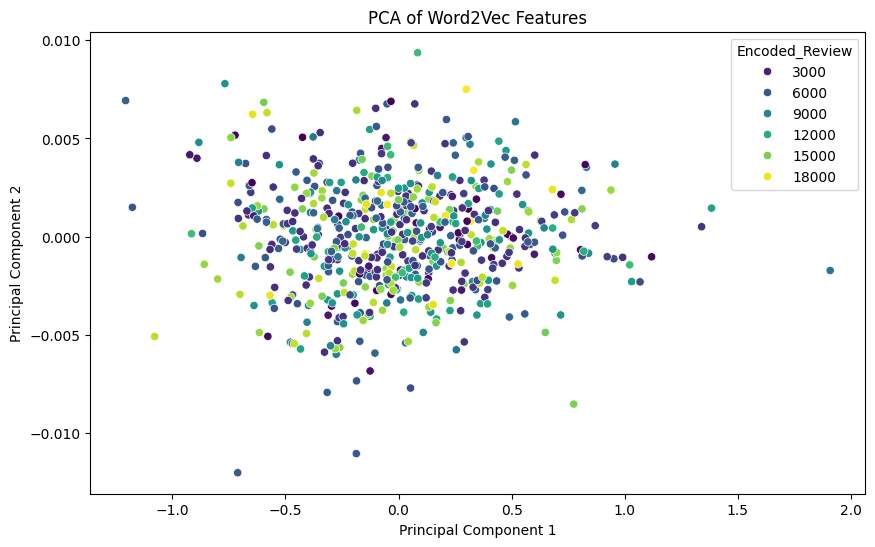

In [31]:


# --- Summary Table ---
# Consolidate results into a summary table
summary_data = pd.DataFrame({
    "Model": ["Bag of Words (LR)", "TF-IDF (LR)", "Word2Vec (LR)", "BERT (LR)",
              "Bag of Words (DT)", "TF-IDF (DT)", "Word2Vec (DT)", "BERT (DT)"],
    "Precision": [lr_bow["Precision"], lr_tfidf["Precision"], lr_word2vec["Precision"], lr_bert["Precision"],
                  dt_bow["Precision"], dt_tfidf["Precision"], dt_word2vec["Precision"], dt_bert["Precision"]],
    "Recall": [lr_bow["Recall"], lr_tfidf["Recall"], lr_word2vec["Recall"], lr_bert["Recall"],
               dt_bow["Recall"], dt_tfidf["Recall"], dt_word2vec["Recall"], dt_bert["Recall"]],
    "F1-Score": [lr_bow["F1-Score"], lr_tfidf["F1-Score"], lr_word2vec["F1-Score"], lr_bert["F1-Score"],
                 dt_bow["F1-Score"], dt_tfidf["F1-Score"], dt_word2vec["F1-Score"], dt_bert["F1-Score"]],
})

# Display the summary table
print("\n--- Overall Model Performance ---\n")
print(summary_data)

# PCA Visualization for Word2Vec Features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_word2vec)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="viridis")
plt.title("PCA of Word2Vec Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()